#    第四课 Pandas时序型数据分析
## 第七节 实战：股票数据分析


运用所学的知识，对3个汽车行业的美股行情进行分析
* 特斯拉
* 福特
* 通用

## Step 0: 引入相关模块/包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: 加载股票市场行情数据

In [2]:
tsla_df = pd.read_csv('./data/tsla_data.csv', index_col='date', parse_dates=True)
ford_df = pd.read_csv('./data/ford_data.csv', index_col='date', parse_dates=True)
gm_df = pd.read_csv('./data/gm_data.csv', index_col='date', parse_dates=True)

In [4]:
tsla_df.head()

1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2010-06-29    19.00  25.0000   17.54     23.89              23.89  18766300.0   
2010-06-30    25.79  30.4192   23.30     23.83              23.83  17187100.0   
2010-07-01    25.00  25.9200   20.27     21.96              21.96   8218800.0   
2010-07-02    23.00  23.1000   18.71     19.20              19.20   5139800.0   
2010-07-06    20.00  20.0000   15.83     16.11              16.11   6866900.0   

            7. dividend amount  8. split coefficient  
date                                                  
2010-06-29                 0.0                   1.0  
2010-06-30                 0.0                   1.0  
2010-07-01                 0.0                   1.0  
2010-07-02                 0.0                   1.0  
2010-07-06                 0.0                   1.0

In [3]:
ford_df.head()

1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
date                                                                           
2000-03-01    52.75    53.19   52.13     52.38            24.5595    2582177   
2000-04-01    51.81    52.25   50.31     50.63            23.7390    4660980   
2000-05-01    51.00    51.50   50.75     50.81            23.8234    3207002   
2000-06-01    51.00    51.81   50.38     50.88            23.8562    2892998   
2000-07-01    52.50    55.00   52.13     54.63            25.6144    5898154   

            7. dividend amount  8. split coefficient  
date                                                  
2000-03-01                 0.0                     1  
2000-04-01                 0.0                     1  
2000-05-01                 0.0                     1  
2000-06-01                 0.0                     1  
2000-07-01                 0.0                     1

In [5]:
gm_df.head()

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2010-11-18    35.00    35.99   33.89     34.19            28.1855   
2010-11-19    34.15    34.50   33.11     34.26            28.2432   
2010-11-22    34.20    34.48   33.81     34.08            28.0948   
2010-11-23    33.95    33.99   33.19     33.25            27.4106   
2010-11-24    33.73    33.80   33.22     33.48            27.6002   

              6. volume  7. dividend amount  8. split coefficient  
date                                                               
2010-11-18  457044300.0                 0.0                   1.0  
2010-11-19  107842000.0                 0.0                   1.0  
2010-11-22   36650600.0                 0.0                   1.0  
2010-11-23   31170200.0                 0.0                   1.0  
2010-11-24   26138000.0                 0.0                   1.0

## Step 2: 可视化数据

### 2.1 收盘价可视化

In [5]:
tsla_df = tsla_df.loc['20120101':]
ford_df = ford_df.loc['20120101':]
gm_df = gm_df.loc['20120101':]

<ipython-input-5-1b085ed4c986>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ford_df = ford_df.loc['20120101':]


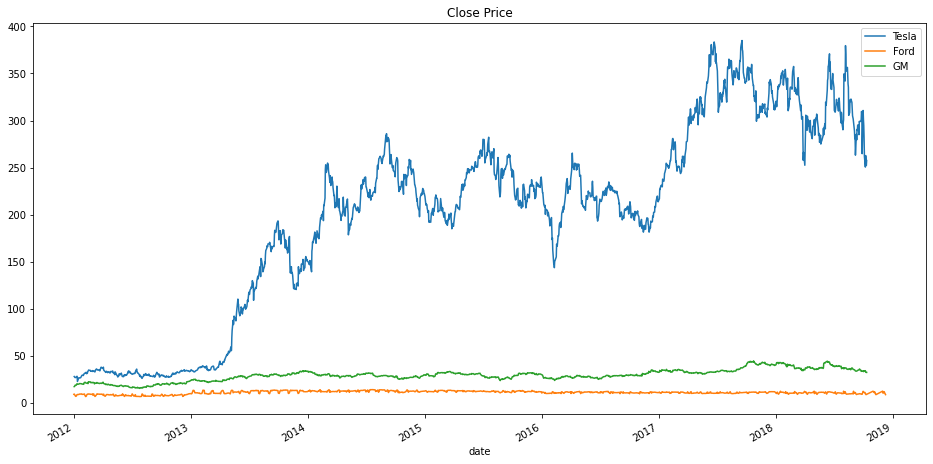

In [6]:
tsla_df['5. adjusted close'].plot(label='Tesla', figsize=(16,8), title='Close Price')
ford_df['5. adjusted close'].plot(label='Ford')
gm_df['5. adjusted close'].plot(label='GM')
plt.legend()

### 2.2 日成交量可视化

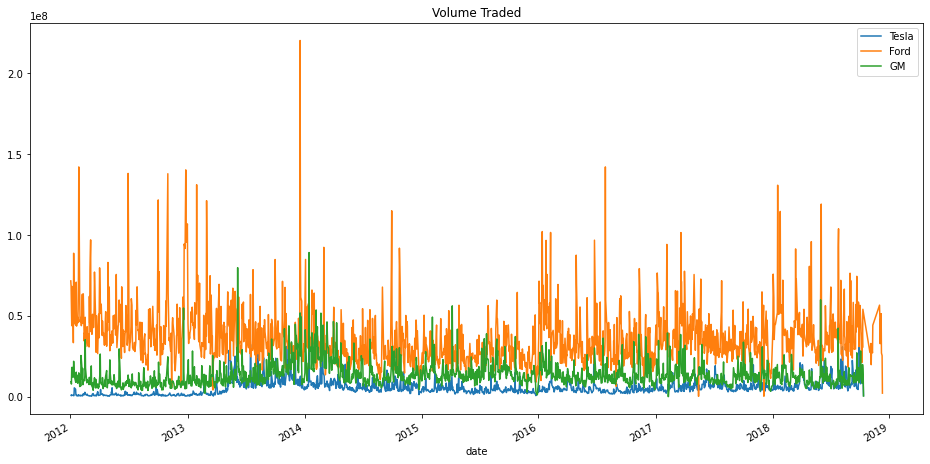

In [7]:
tsla_df['6. volume'].plot(label='Tesla', figsize=(16, 8), title='Volume Traded')
ford_df['6. volume'].plot(label='Ford')
gm_df['6. volume'].plot(label='GM')
plt.legend()

In [8]:
ford_df['6. volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

Q: 2013年12月18日福特的股价发生了什么？

A: https://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html

每股10美元，100股 vs 每股1美元，100000股

In [9]:
tsla_df['Total Traded'] = tsla_df['1. open'] * tsla_df['6. volume']
ford_df['Total Traded'] = ford_df['1. open'] * ford_df['6. volume']
gm_df['Total Traded'] = gm_df['1. open'] * gm_df['6. volume']

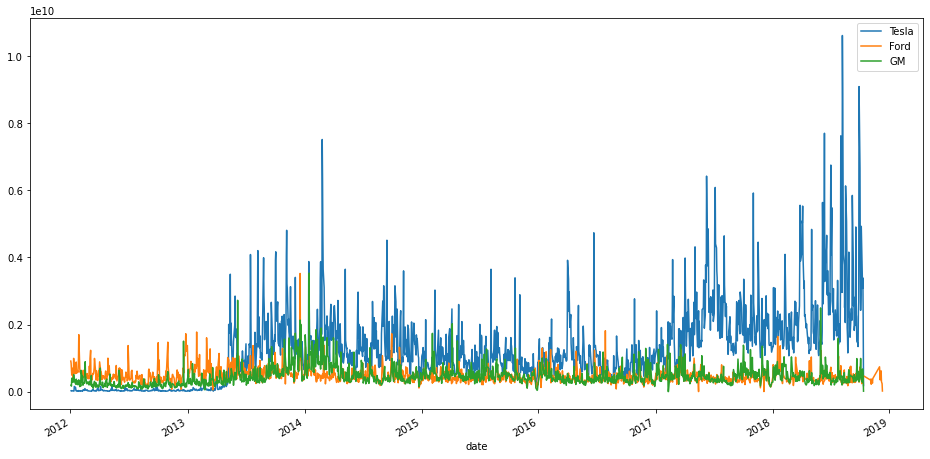

In [10]:
tsla_df['Total Traded'].plot(label='Tesla', figsize=(16, 8))
ford_df['Total Traded'].plot(label='Ford')
gm_df['Total Traded'].plot(label='GM')
plt.legend()

In [11]:
tsla_df['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

Q: 2018年8月7日特斯拉发生了什么？

A: https://www.theguardian.com/technology/2018/aug/07/elon-musk-tesla-inc-private <br/>
https://cn.reuters.com/article/tesla-musk-stock-privatization-0808-idCNKBS1KT0FK

## Step 3: 股票数据分析

### 3.1 价格相关性分析

In [12]:
stocks_df = pd.DataFrame(columns=['Tesla', 'Ford', 'GM'], index=tsla_df.index)
stocks_df.head()

Tesla Ford   GM
date                      
2012-01-03   NaN  NaN  NaN
2012-01-04   NaN  NaN  NaN
2012-01-05   NaN  NaN  NaN
2012-01-06   NaN  NaN  NaN
2012-01-09   NaN  NaN  NaN

In [14]:
stocks_df['Tesla'] = tsla_df['4. close']
stocks_df['Ford'] = ford_df['4. close']
stocks_df['GM'] = gm_df['4. close']

In [15]:
stocks_df.head()

Tesla   Ford     GM
date                           
2012-01-03  28.08  12.66  21.05
2012-01-04  27.71    NaN  21.15
2012-01-05  27.12  11.23  22.17
2012-01-06  26.91  10.12  22.92
2012-01-09  27.25    NaN  22.84

* 使用[pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)可视化相关性

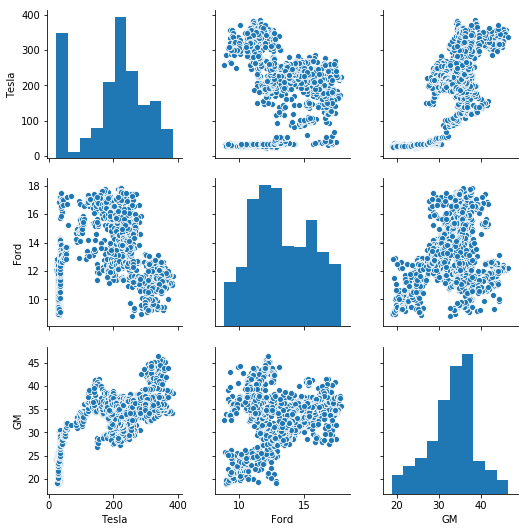

In [19]:
import seaborn as sns

sns.pairplot(stocks_df.dropna())

* 使用[corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)量化相关性

In [20]:
stocks_df.dropna().corr()

Tesla      Ford        GM
Tesla  1.000000 -0.009900  0.755557
Ford  -0.009900  1.000000  0.281902
GM     0.755557  0.281902  1.000000

### 3.2 日收益率分析

日收益率计算公式：

$ r_t = \frac{p_t}{p_{t-1}} -1$

* $p_t$: $t$ 时刻的价格
* $p_{t-1}$: $t-1$ 时刻的价格

* 用[shift()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)操作

In [23]:
tsla_df['returns'] = (tsla_df['4. close'] / tsla_df['4. close'].shift(1) ) - 1

In [24]:
tsla_df.head()

1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
date                                                                           
2012-01-03    28.94    29.50   27.65     28.08              28.08   928100.0   
2012-01-04    28.21    28.67   27.50     27.71              27.71   630100.0   
2012-01-05    27.76    27.93   26.85     27.12              27.12  1005500.0   
2012-01-06    27.20    27.79   26.41     26.91              26.91   986300.0   
2012-01-09    27.00    27.49   26.12     27.25              27.25   897000.0   

            7. dividend amount  8. split coefficient  Total Traded   returns  
date                                                                          
2012-01-03                 0.0                   1.0    26859214.0       NaN  
2012-01-04                 0.0                   1.0    17775121.0 -0.013177  
2012-01-05                 0.0                   1.0    27912680.0 -0.021292  
2012-01-06                 0.0                   1.0    26827360.0 -0.007743  
2012-01-09                 0.0                   1.0    24219000.0  0.012635

In [25]:
ford_df['returns'] = (ford_df['4. close'] / ford_df['4. close'].shift(1) ) - 1
gm_df['returns'] = (gm_df['4. close'] / gm_df['4. close'].shift(1) ) - 1

In [26]:
ford_df.head()

1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
date                                                                           
2012-03-01    11.00    11.25   10.99     11.13             8.2903   45709900   
2012-04-01    11.15    11.53   11.07     11.30             8.4170   79725200   
2012-05-01    11.33    11.63   11.24     11.59             8.6330   67877500   
2012-06-01    11.74    11.80   11.52     11.71             8.7224   59840700   
2012-09-01    11.83    11.95   11.70     11.80             8.7894   53981500   

            7. dividend amount  8. split coefficient  Total Traded   returns  
date                                                                          
2012-03-01                 0.0                     1   502808900.0       NaN  
2012-04-01                 0.0                     1   888935980.0  0.015274  
2012-05-01                 0.0                     1   769052075.0  0.025664  
2012-06-01                 0.0                     1   702529818.0  0.010354  
2012-09-01                 0.0                     1   638601145.0  0.007686

In [27]:
gm_df.head()

1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2012-01-03    20.83    21.18   20.75     21.05            17.3532   9321300.0   
2012-01-04    21.05    21.37   20.75     21.15            17.4356   7856700.0   
2012-01-05    21.10    22.29   20.96     22.17            18.2765  17880600.0   
2012-01-06    22.26    23.03   22.24     22.92            18.8948  18234500.0   
2012-01-09    23.20    23.43   22.70     22.84            18.8288  12084500.0   

            7. dividend amount  8. split coefficient  Total Traded   returns  
date                                                                          
2012-01-03                 0.0                   1.0   194162679.0       NaN  
2012-01-04                 0.0                   1.0   165383535.0  0.004751  
2012-01-05                 0.0                   1.0   377280660.0  0.048227  
2012-01-06                 0.0                   1.0   405899970.0  0.033829  
2012-01-09                 0.0                   1.0   280360400.0 -0.003490

* 使用直方图查看日收益率的稳定性

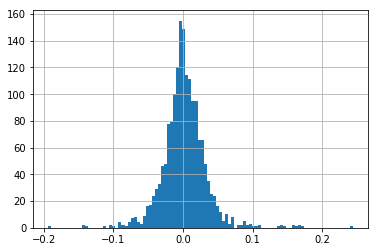

In [28]:
tsla_df['returns'].hist(bins=100)

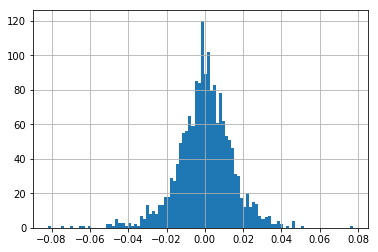

In [29]:
ford_df['returns'].hist(bins=100)

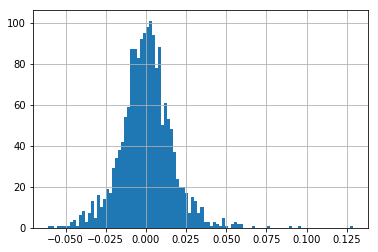

In [30]:
gm_df['returns'].hist(bins=100)

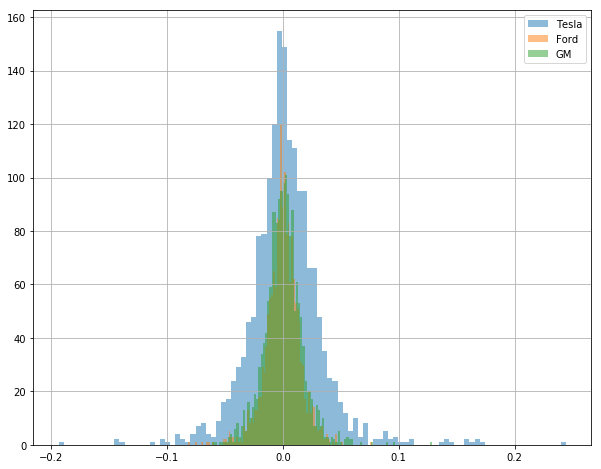

In [31]:
tsla_df['returns'].hist(bins=100, label='Tesla', figsize=(10, 8), alpha=0.5)
ford_df['returns'].hist(bins=100, label='Ford', alpha=0.5)
gm_df['returns'].hist(bins=100, label='GM', alpha=0.5)
plt.legend()

* 使用盒子图比较不同股票的日收益率

In [32]:
returns_df = pd.concat([tsla_df['returns'], ford_df['returns'], gm_df['returns']], axis=1)
returns_df.columns = ['Tesla Returns', 'Ford Returns', 'GM Returns']

In [33]:
returns_df.head()

Tesla Returns  Ford Returns  GM Returns
date                                               
2012-01-02            NaN     -0.007246         NaN
2012-01-03            NaN      0.022617         NaN
2012-01-04      -0.013177           NaN    0.004751
2012-01-05      -0.021292     -0.004433    0.048227
2012-01-06      -0.007743     -0.041667    0.033829

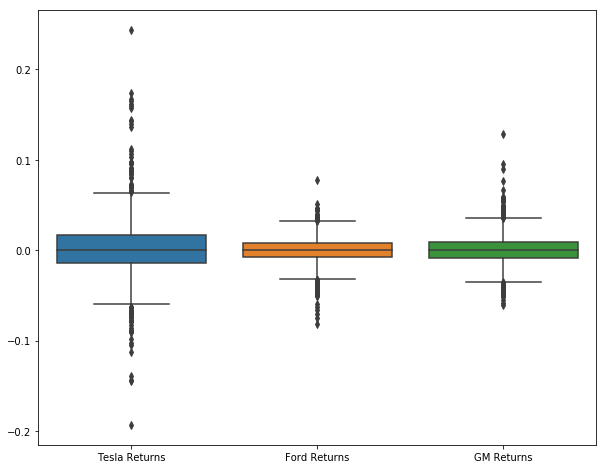

In [34]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=returns_df)